# Lab 6: Clustering


## Preprocess Data: check for missing values

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import normalized_mutual_info_score

heartData = pd.read_csv("D:\Programming\Python_code\PrinciplesOfDS_Course\Labs\Data\heart.csv")
print(heartData.info()) # all data types int or float, no non-numeric features. No categorical features to convert 

# Check for missing values 
heartData.isna().sum()/heartData.shape[0] # all values 0. No missing values. 

# split data into training and testing partitions

X, y = heartData.drop(columns='target'), heartData.target

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size= 0.14, random_state=2)

print("view shapes:", X_train_val.shape, X_test.shape)
print(X_train_val.shape) # correct split value achieved 
print(y_train_val.shape)

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

In [ ]:
# no point in doing more than 2 clusters as we know there are only 2 possible categories already
cluster = KMeans(n_clusters=2, random_state=1).fit(X_train_val) 

nmi = normalized_mutual_info_score(cluster.labels_, y_train_val, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

## Try different hyper-parameters


In [ ]:
test_k = [2,3,4,5]
test_n_init = [10, 20, 30, 50]
test_init = ['k-means++', 'random']

best_nmi = 0
best_k = None
best_n_init = None
best_init = None

for k in test_k:
    for n in test_n_init:
        for init in test_init:
            temp_cluster = KMeans(n_clusters=k, init=init, n_init=n).fit(X_train_val)
            temp_nmi = normalized_mutual_info_score(temp_cluster.labels_, y_train_val, average_method='arithmetic')
            print(temp_nmi)
            if(temp_nmi > best_nmi):
                best_nmi = temp_nmi
                best_k = k
                best_n_init = n
                best_init = init

print("Best of each category:\nBest nmi {}\nBest k cluster {}\nBest n_init {}\nBest init {}".format(best_nmi, best_k, best_n_init, best_init))

### Thoughts on different parameters: 
As stated above, there really isnt a point in trying to use more than 2 clusters, as we only have 2 possible categories of data. We know this going in, so we know the optimal cluster amount going in. Results substantially change for the worse with greater cluster amounts, further, there is no real imrovement on the nmi score in testing other hyperparameters. 

In [ ]:
# Predicting

### Dimensionality reduction for clear visualization of data


In [30]:
from sklearn.decomposition import PCA

print(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# print(X_scaled) # normalized 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA values:\n", X_pca[0:9,:])

explained_variance_ratios = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_variance_ratios) 
# [0.21254053 0.11820708], this is not a large amount of the variance which makes me think that PCA may not be very appropriate for this task. 

X_centered = X - np.mean(X, axis=0)
pca2 = PCA(n_components=2)
X_pca_cent = pca2.fit_transform(X_centered)
print("PCA centered values:\n", X_pca_cent[0:9,:])
print("Explained variance ratios for centered PCA:", pca2.explained_variance_ratio_) 
print(type(pca2))
# [0.7475642  0.15037022]

# ok.. so something about centering versus centering and standardizing really affects the outcome of PCA.. I really wonder why, but just don't know right now. Asking chatGPT 

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

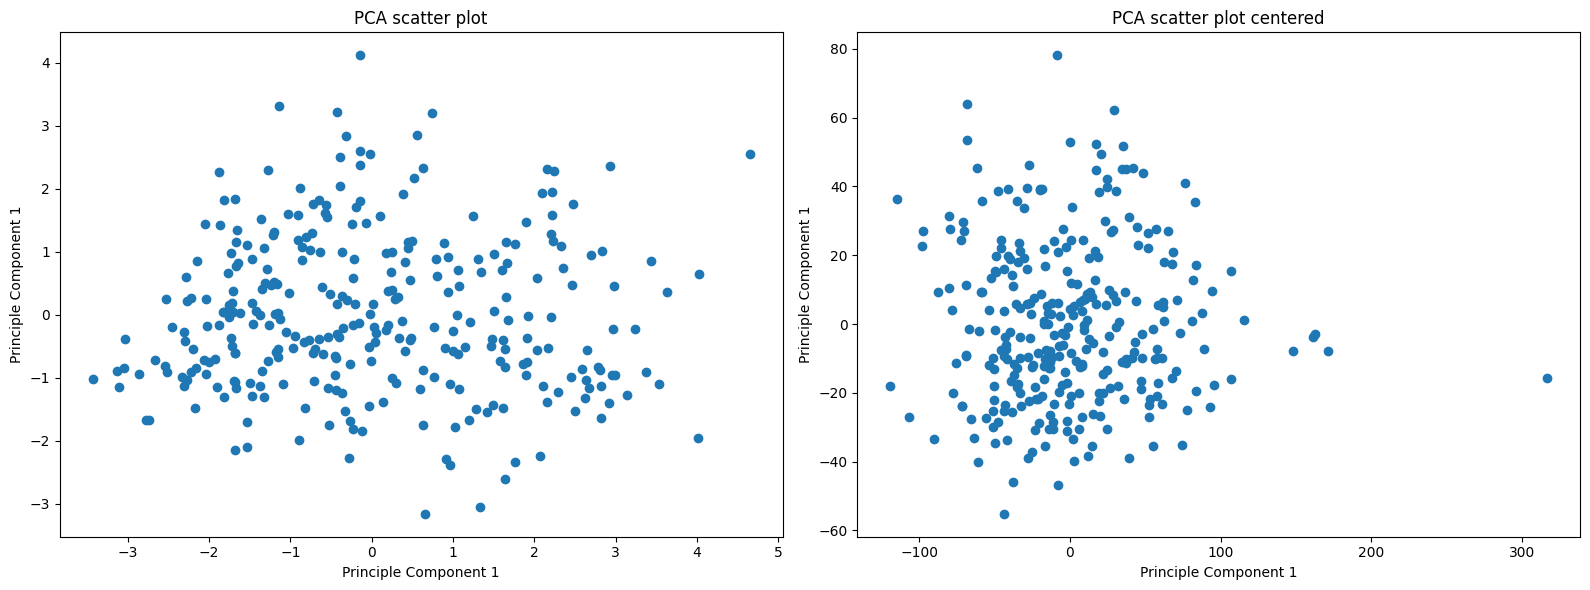

In [29]:
# Set the figure size
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 1")
plt.title("PCA scatter plot")

plt.subplot(1,2,2)
plt.scatter(X_pca_cent[:,0], X_pca_cent[:,1])
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 1")
plt.title("PCA scatter plot centered")
#plt.figure(figsize=(12, 6))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

# visualizing feature pairs in order to understand potential visualizations which may be valid 

cluster = KMeans(n_clusters=3, random_state=1).fit(X_train_val)

print(type(cluster))
print(len(cluster.labels_))
# Add cluster labels to the original dataset
print(type(heartData))
heartDataVis = heartData.iloc[:260,:5]
heartDataVis['cluster'] = cluster.labels_


# Create a pair plot of the clustering results
sns.pairplot(heartDataVis, hue='cluster', diag_kind='hist')
plt.show()